In [1]:
# Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
from census import Census
import seaborn as sns
%matplotlib inline

# Census API Key
from localenv import census_api_key

In [2]:
# Load census daya 2011 - 2015

c11 = Census(census_api_key, year=2011)
c12 = Census(census_api_key, year=2012)
c13 = Census(census_api_key, year=2013)
c14 = Census(census_api_key, year=2014)
c15 = Census(census_api_key, year=2015)

In [3]:
census_data11 = c11.acs5.get(("NAME", 
                          "B19013_001E", 
                          "B01003_001E", 
                          "B01002_001E",
                          "B23025_005E", 
                          "B25058_001E", 
                          "B25077_001E"), {'for': 'state:*'})

census_data12 = c12.acs5.get(("NAME", 
                          "B19013_001E", 
                          "B01003_001E", 
                          "B01002_001E",
                          "B23025_005E",
                          "B25058_001E", 
                          "B25077_001E"), {'for': 'state:*'})

census_data13 = c13.acs5.get(("NAME", 
                          "B19013_001E", 
                          "B01003_001E", 
                          "B01002_001E",
                          "B23025_005E", 
                          "B25058_001E", 
                          "B25077_001E"), {'for': 'state:*'})

census_data14 = c14.acs5.get(("NAME", 
                          "B19013_001E", 
                          "B01003_001E", 
                          "B01002_001E",
                          "B23025_005E", 
                          "B25058_001E", 
                          "B25077_001E"), {'for': 'state:*'})

census_data15 = c15.acs5.get(("NAME", 
                          "B19013_001E", 
                          "B01003_001E", 
                          "B01002_001E",
                          "B23025_005E", 
                          "B25058_001E", 
                          "B25077_001E"), {'for': 'state:*'})

In [4]:
# Convert to DataFrame
census_pd11 = pd.DataFrame(census_data11)

# Column Reordering
census_pd11 = census_pd11.rename(columns={"B01003_001E": "Population (2011)",
                                      "B01002_001E": "Median Age (2011)",
                                      "B19013_001E": "Household Income (2011)",
                                      "B23025_005E": "Unemployment Count (2011)",
                                      "B25058_001E": "Median Rent (2011)",
                                      "B25077_001E": "Median Home Value (2011)",
                                      "NAME": "Name", 
                                      "state": "State"})

# Add in Employment Rate (Employment Count / Population)
census_pd11["Unemployment Rate (2011)"] = 100 * \
    census_pd11["Unemployment Count (2011)"].astype(
        int) / census_pd11["Population (2011)"].astype(int)

# Final DataFrame
census_pd11 = census_pd11[["State", "Name", "Population (2011)", "Median Age (2011)", "Household Income (2011)", 
                           "Unemployment Rate (2011)", "Median Rent (2011)", "Median Home Value (2011)"]]

census_pd11.head()

,State,Name,Population (2011),Median Age (2011),Household Income (2011),Unemployment Rate (2011),Median Rent (2011),Median Home Value (2011)
0,01,Alabama,4747424,37.7,42934,4.540210,469,120800
1,02,Alaska,700703,33.8,69014,4.414424,913,235100
2,04,Arizona,6337373,35.7,50752,4.234610,742,197400
3,05,Arkansas,2895928,37.3,40149,3.940015,455,105100
4,06,California,36969200,35.1,61632,5.055211,1083,421600


In [5]:
# Convert to DataFrame
census_pd12 = pd.DataFrame(census_data12)

# Column Reordering
census_pd12 = census_pd12.rename(columns={"B01003_001E": "Population (2012)",
                                      "B01002_001E": "Median Age (2012)",
                                      "B19013_001E": "Household Income (2012)",
                                      "B23025_005E": "Unemployment Count (2012)",
                                      "B25058_001E": "Median Rent (2012)",
                                      "B25077_001E": "Median Home Value (2012)", 
                                      "NAME": "Name (2012)", 
                                      "state": "State (2012)"})

# Add in Employment Rate (Employment Count / Population)
census_pd12["Unemployment Rate (2012)"] = 100 * \
    census_pd12["Unemployment Count (2012)"].astype(
        int) / census_pd12["Population (2012)"].astype(int)

# Final DataFrame
census_pd12 = census_pd12[["Name (2012)", "State (2012)", "Population (2012)", "Median Age (2012)", "Household Income (2012)", "Unemployment Rate (2012)", "Median Rent (2012)", "Median Home Value (2012)"]]

census_pd12.head()

,Name (2012),State (2012),Population (2012),Median Age (2012),Household Income (2012),Unemployment Rate (2012),Median Rent (2012),Median Home Value (2012)
0,Alabama,01,4777326.0,37.8,43160.0,4.830694,488.0,122300.0
1,Alaska,02,711139.0,33.8,69917.0,4.411093,950.0,237900.0
2,Arizona,04,6410979.0,36.0,50256.0,4.619139,742.0,175900.0
3,Arkansas,05,2916372.0,37.4,40531.0,4.023972,468.0,106300.0
4,California,06,37325068.0,35.2,61400.0,5.517589,1110.0,383900.0


In [6]:
# Convert to DataFrame
census_pd13 = pd.DataFrame(census_data13)

# Column Reordering
census_pd13 = census_pd13.rename(columns={"B01003_001E": "Population (2013)",
                                      "B01002_001E": "Median Age (2013)",
                                      "B19013_001E": "Household Income (2013)",
                                      "B23025_005E": "Unemployment Count (2013)",
                                      "B25058_001E": "Median Rent (2013)",
                                      "B25077_001E": "Median Home Value (2013)", 
                                      "NAME": "Name (2013)", 
                                      "state": "State (2013)"})

# Add in Employment Rate (Employment Count / Population)
census_pd13["Unemployment Rate (2013)"] = 100 * \
    census_pd13["Unemployment Count (2013)"].astype(
        int) / census_pd13["Population (2013)"].astype(int)

# Final DataFrame
census_pd13 = census_pd13[["Name (2013)", "State (2013)", "Population (2013)", "Median Age (2013)", "Household Income (2013)", "Unemployment Rate (2013)", "Median Rent (2013)", "Median Home Value (2013)"]]

census_pd13.head()

,Name (2013),State (2013),Population (2013),Median Age (2013),Household Income (2013),Unemployment Rate (2013),Median Rent (2013),Median Home Value (2013)
0,Alabama,01,4799277.0,38.1,43253.0,5.040968,501.0,122500.0
1,Alaska,02,720316.0,33.6,70760.0,4.572854,978.0,241800.0
2,Arizona,04,6479703.0,36.3,49774.0,4.882323,747.0,165100.0
3,Arkansas,05,2933369.0,37.5,40768.0,4.132961,480.0,107300.0
4,California,06,37659181.0,35.4,61094.0,5.758662,1119.0,366400.0


In [7]:
# Convert to DataFrame
census_pd14 = pd.DataFrame(census_data14)

# Column Reordering
census_pd14 = census_pd14.rename(columns={"B01003_001E": "Population (2014)",
                                      "B01002_001E": "Median Age (2014)",
                                      "B19013_001E": "Household Income (2014)",
                                      "B23025_005E": "Unemployment Count (2014)",
                                      "B25058_001E": "Median Rent (2014)",
                                      "B25077_001E": "Median Home Value (2014)", 
                                      "NAME": "Name (2014)", 
                                      "state": "State (2014)"})

# Add in Employment Rate (Employment Count / Population)
census_pd14["Unemployment Rate (2014)"] = 100 * \
    census_pd14["Unemployment Count (2014)"].astype(
        int) / census_pd14["Population (2014)"].astype(int)

# Final DataFrame
census_pd14 = census_pd14[["Name (2014)", "State (2014)", "Population (2014)", "Median Age (2014)", "Household Income (2014)", "Unemployment Rate (2014)", "Median Rent (2014)", "Median Home Value (2014)"]]

census_pd14.head()

,Name (2014),State (2014),Population (2014),Median Age (2014),Household Income (2014),Unemployment Rate (2014),Median Rent (2014),Median Home Value (2014)
0,Alabama,01,4817678.0,38.2,43511.0,4.747432,511.0,123800.0
1,Alaska,02,728300.0,33.4,71829.0,4.407112,1012.0,246300.0
2,Arizona,04,6561516.0,36.5,49928.0,4.634097,753.0,162900.0
3,Arkansas,05,2947036.0,37.6,41264.0,3.905280,492.0,108700.0
4,California,06,38066920.0,35.6,61489.0,5.476051,1138.0,371400.0


In [8]:
# Convert to DataFrame
census_pd15 = pd.DataFrame(census_data15)

# Column Reordering
census_pd15 = census_pd15.rename(columns={"B01003_001E": "Population (2015)",
                                      "B01002_001E": "Median Age (2015)",
                                      "B19013_001E": "Household Income (2015)",
                                      "B23025_005E": "Unemployment Count (2015)",
                                      "B25058_001E": "Median Rent (2015)", 
                                      "B25077_001E": "Median Home Value (2015)", 
                                      "NAME": "Name (2015)", 
                                      "state": "State (2015)"})

# Add in Employment Rate (Employment Count / Population)
census_pd15["Unemployment Rate (2015)"] = 100 * \
    census_pd15["Unemployment Count (2015)"].astype(
        int) / census_pd15["Population (2015)"].astype(int)

# Final DataFrame
census_pd15 = census_pd15[["Name (2015)", "State (2015)", "Population (2015)", "Median Age (2015)", "Household Income (2015)", "Unemployment Rate (2015)", "Median Rent (2015)", "Median Home Value (2015)"]]

census_pd15.head()

,Name (2015),State (2015),Population (2015),Median Age (2015),Household Income (2015),Unemployment Rate (2015),Median Rent (2015),Median Home Value (2015)
0,Alaska,02,733375.0,33.4,72515.0,4.265894,1030.0,250000.0
1,Alabama,01,4830620.0,38.4,43623.0,4.287172,520.0,125500.0
2,Arkansas,05,2958208.0,37.7,41371.0,3.547519,498.0,111400.0
3,Arizona,04,6641928.0,36.8,50255.0,4.151084,760.0,167500.0
4,California,06,38421464.0,35.8,61818.0,4.921939,1149.0,385500.0


In [9]:
#merging 2011-2012
census_merge1112 = pd.merge(census_pd11, census_pd12, left_index=True, right_index=True, how='outer')
census_merge1112.rename(index=str, columns={"Name":"State"})
dropColumns = ["State (2012)", "Name (2012)"]
census_merge1112.drop(dropColumns, inplace=True, axis=1)
census_merge1112.head()

,State,Name,Population (2011),Median Age (2011),Household Income (2011),Unemployment Rate (2011),Median Rent (2011),Median Home Value (2011),Population (2012),Median Age (2012),Household Income (2012),Unemployment Rate (2012),Median Rent (2012),Median Home Value (2012)
0,01,Alabama,4747424,37.7,42934,4.540210,469,120800,4777326.0,37.8,43160.0,4.830694,488.0,122300.0
1,02,Alaska,700703,33.8,69014,4.414424,913,235100,711139.0,33.8,69917.0,4.411093,950.0,237900.0
2,04,Arizona,6337373,35.7,50752,4.234610,742,197400,6410979.0,36.0,50256.0,4.619139,742.0,175900.0
3,05,Arkansas,2895928,37.3,40149,3.940015,455,105100,2916372.0,37.4,40531.0,4.023972,468.0,106300.0
4,06,California,36969200,35.1,61632,5.055211,1083,421600,37325068.0,35.2,61400.0,5.517589,1110.0,383900.0


In [10]:
#merging 2011-2013
census_merge111213 = pd.merge(census_merge1112, census_pd13, left_index=True, right_index=True, how='outer')
dropColumns = ["State (2013)", "Name (2013)"]
census_merge111213.drop(dropColumns, inplace=True, axis=1)
census_merge111213.head()

,State,Name,Population (2011),Median Age (2011),Household Income (2011),Unemployment Rate (2011),Median Rent (2011),Median Home Value (2011),Population (2012),Median Age (2012),Household Income (2012),Unemployment Rate (2012),Median Rent (2012),Median Home Value (2012),Population (2013),Median Age (2013),Household Income (2013),Unemployment Rate (2013),Median Rent (2013),Median Home Value (2013)
0,01,Alabama,4747424,37.7,42934,4.540210,469,120800,4777326.0,37.8,43160.0,4.830694,488.0,122300.0,4799277.0,38.1,43253.0,5.040968,501.0,122500.0
1,02,Alaska,700703,33.8,69014,4.414424,913,235100,711139.0,33.8,69917.0,4.411093,950.0,237900.0,720316.0,33.6,70760.0,4.572854,978.0,241800.0
2,04,Arizona,6337373,35.7,50752,4.234610,742,197400,6410979.0,36.0,50256.0,4.619139,742.0,175900.0,6479703.0,36.3,49774.0,4.882323,747.0,165100.0
3,05,Arkansas,2895928,37.3,40149,3.940015,455,105100,2916372.0,37.4,40531.0,4.023972,468.0,106300.0,2933369.0,37.5,40768.0,4.132961,480.0,107300.0
4,06,California,36969200,35.1,61632,5.055211,1083,421600,37325068.0,35.2,61400.0,5.517589,1110.0,383900.0,37659181.0,35.4,61094.0,5.758662,1119.0,366400.0


In [11]:
#merging 2011-2014
census_merge11121314 = pd.merge(census_merge111213, census_pd14, left_index=True, right_index=True, how='outer')
dropColumns = ["State (2014)", "Name (2014)"]
census_merge11121314.drop(dropColumns, inplace=True, axis=1)
census_merge11121314.head()

,State,Name,Population (2011),Median Age (2011),Household Income (2011),Unemployment Rate (2011),Median Rent (2011),Median Home Value (2011),Population (2012),Median Age (2012),...,Household Income (2013),Unemployment Rate (2013),Median Rent (2013),Median Home Value (2013),Population (2014),Median Age (2014),Household Income (2014),Unemployment Rate (2014),Median Rent (2014),Median Home Value (2014)
0,01,Alabama,4747424,37.7,42934,4.540210,469,120800,4777326.0,37.8,...,43253.0,5.040968,501.0,122500.0,4817678.0,38.2,43511.0,4.747432,511.0,123800.0
1,02,Alaska,700703,33.8,69014,4.414424,913,235100,711139.0,33.8,...,70760.0,4.572854,978.0,241800.0,728300.0,33.4,71829.0,4.407112,1012.0,246300.0
2,04,Arizona,6337373,35.7,50752,4.234610,742,197400,6410979.0,36.0,...,49774.0,4.882323,747.0,165100.0,6561516.0,36.5,49928.0,4.634097,753.0,162900.0
3,05,Arkansas,2895928,37.3,40149,3.940015,455,105100,2916372.0,37.4,...,40768.0,4.132961,480.0,107300.0,2947036.0,37.6,41264.0,3.905280,492.0,108700.0
4,06,California,36969200,35.1,61632,5.055211,1083,421600,37325068.0,35.2,...,61094.0,5.758662,1119.0,366400.0,38066920.0,35.6,61489.0,5.476051,1138.0,371400.0


In [12]:
#final merge years 2011-2015
census_2011_2015 = pd.merge(census_merge11121314, census_pd15, left_index=True, right_index=True, how='outer')
dropColumns = ["State", "State (2015)", "Name (2015)"]
census_2011_2015.drop(dropColumns, inplace=True, axis=1)
census_2011_2015.head()

,Name,Population (2011),Median Age (2011),Household Income (2011),Unemployment Rate (2011),Median Rent (2011),Median Home Value (2011),Population (2012),Median Age (2012),Household Income (2012),...,Household Income (2014),Unemployment Rate (2014),Median Rent (2014),Median Home Value (2014),Population (2015),Median Age (2015),Household Income (2015),Unemployment Rate (2015),Median Rent (2015),Median Home Value (2015)
0,Alabama,4747424,37.7,42934,4.540210,469,120800,4777326.0,37.8,43160.0,...,43511.0,4.747432,511.0,123800.0,733375.0,33.4,72515.0,4.265894,1030.0,250000.0
1,Alaska,700703,33.8,69014,4.414424,913,235100,711139.0,33.8,69917.0,...,71829.0,4.407112,1012.0,246300.0,4830620.0,38.4,43623.0,4.287172,520.0,125500.0
2,Arizona,6337373,35.7,50752,4.234610,742,197400,6410979.0,36.0,50256.0,...,49928.0,4.634097,753.0,162900.0,2958208.0,37.7,41371.0,3.547519,498.0,111400.0
3,Arkansas,2895928,37.3,40149,3.940015,455,105100,2916372.0,37.4,40531.0,...,41264.0,3.905280,492.0,108700.0,6641928.0,36.8,50255.0,4.151084,760.0,167500.0
4,California,36969200,35.1,61632,5.055211,1083,421600,37325068.0,35.2,61400.0,...,61489.0,5.476051,1138.0,371400.0,38421464.0,35.8,61818.0,4.921939,1149.0,385500.0


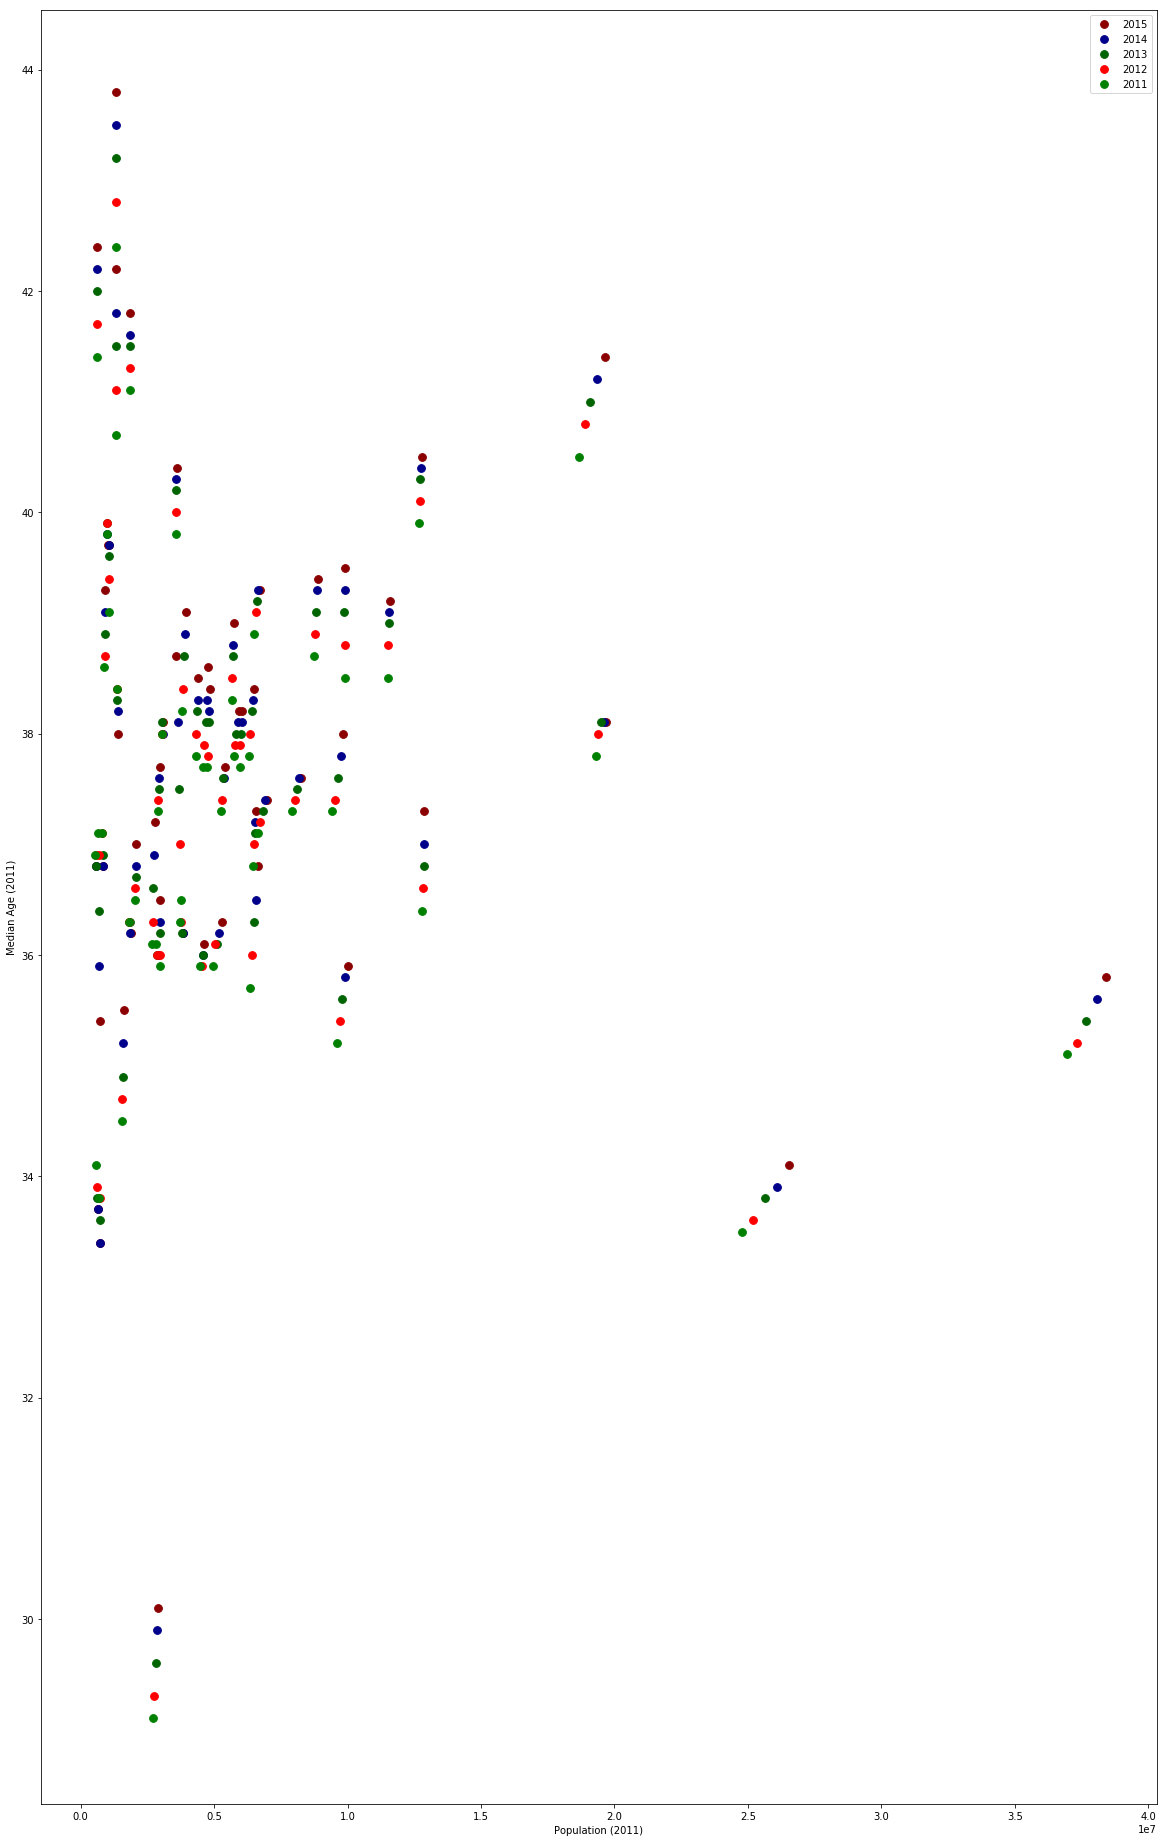

In [13]:
# 50 states plot for Median Age v. Population

census_2011_2015_50States = census_2011_2015.set_index("Name")

census_2011_2015_50States["Population (2015)"] = pd.to_numeric(census_2011_2015_50States["Population (2015)"])
census_2011_2015_50States["Median Age (2015)"] = pd.to_numeric(census_2011_2015_50States["Median Age (2015)"])
census_2011_2015_50States["Population (2014)"] = pd.to_numeric(census_2011_2015_50States["Population (2014)"])
census_2011_2015_50States["Median Age (2014)"] = pd.to_numeric(census_2011_2015_50States["Median Age (2014)"])
census_2011_2015_50States["Population (2013)"] = pd.to_numeric(census_2011_2015_50States["Population (2013)"])
census_2011_2015_50States["Median Age (2013)"] = pd.to_numeric(census_2011_2015_50States["Median Age (2013)"])
census_2011_2015_50States["Population (2012)"] = pd.to_numeric(census_2011_2015_50States["Population (2012)"])
census_2011_2015_50States["Median Age (2012)"] = pd.to_numeric(census_2011_2015_50States["Median Age (2012)"])
census_2011_2015_50States["Population (2011)"] = pd.to_numeric(census_2011_2015_50States["Population (2011)"])
census_2011_2015_50States["Median Age (2011)"] = pd.to_numeric(census_2011_2015_50States["Median Age (2011)"])
#census_2011_2015["State"] = pd.to_numeric(census_2011_2015["State"])


fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 20
fig_size[1] = 33
plt.rcParams["figure.figsize"] = fig_size


ax = census_2011_2015_50States.plot.scatter(x='Population (2015)', y='Median Age (2015)', label='2015', color = 'DarkRed', s=60)
census_2011_2015_50States.plot.scatter(x='Population (2014)', y='Median Age (2014)', label='2014', color='DarkBlue', s=60, ax=ax)
census_2011_2015_50States.plot.scatter(x='Population (2013)', y='Median Age (2013)', label='2013', color='DarkGreen', s=60, ax=ax)
census_2011_2015_50States.plot.scatter(x='Population (2012)', y='Median Age (2012)', label='2012', color='Red', s=60, ax=ax)
census_2011_2015_50States.plot.scatter(x='Population (2011)', y='Median Age (2011)', label='2011', color='Green', s=60, ax=ax)

plt.savefig("PopulationVersusAge.png")
plt.show()

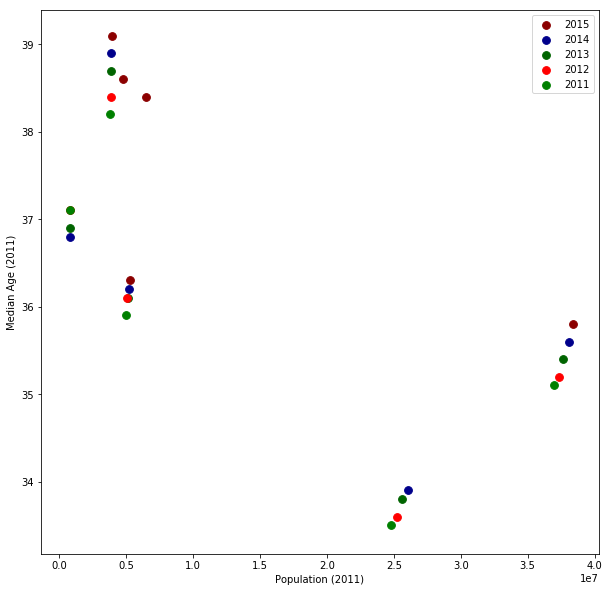

In [14]:
# 5 states plot for Population vs. Age for (California, Colorado, Oregon, South Dakota, Texas)

census_2011_2015_5States= census_2011_2015.drop([0, 1, 2, 3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 38, 39, 40, 42, 44, 45, 46, 47, 48, 49, 50, 51])

census_2011_2015_5States["Population (2015)"] = pd.to_numeric(census_2011_2015_5States["Population (2015)"])
census_2011_2015_5States["Population (2014)"] = pd.to_numeric(census_2011_2015_5States["Population (2014)"])
census_2011_2015_5States["Population (2013)"] = pd.to_numeric(census_2011_2015_5States["Population (2013)"])
census_2011_2015_5States["Population (2012)"] = pd.to_numeric(census_2011_2015_5States["Population (2012)"])
census_2011_2015_5States["Population (2011)"] = pd.to_numeric(census_2011_2015_5States["Population (2011)"])
census_2011_2015_5States["Median Age (2015)"] = pd.to_numeric(census_2011_2015_5States["Median Age (2015)"])
census_2011_2015_5States["Median Age (2014)"] = pd.to_numeric(census_2011_2015_5States["Median Age (2014)"])
census_2011_2015_5States["Median Age (2013)"] = pd.to_numeric(census_2011_2015_5States["Median Age (2013)"])
census_2011_2015_5States["Median Age (2012)"] = pd.to_numeric(census_2011_2015_5States["Median Age (2012)"])
census_2011_2015_5States["Median Age (2011)"] = pd.to_numeric(census_2011_2015_5States["Median Age (2011)"])

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 10
fig_size[1] = 10
plt.rcParams["figure.figsize"] = fig_size

ex = census_2011_2015_5States.plot.scatter(x='Population (2015)', y='Median Age (2015)', label='2015', color = 'DarkRed', s=60)
census_2011_2015_5States.plot.scatter(x='Population (2014)', y= 'Median Age (2014)', label='2014', color='DarkBlue', s=60, ax=ex)
census_2011_2015_5States.plot.scatter(x='Population (2013)', y='Median Age (2013)', label='2013', color='DarkGreen', s=60, ax=ex)
census_2011_2015_5States.plot.scatter(x='Population (2012)', y='Median Age (2012)', label='2012', color='Red', s=60, ax=ex)
census_2011_2015_5States.plot.scatter(x='Population (2011)', y='Median Age (2011)', label='2011', color='Green', s=60, ax=ex)


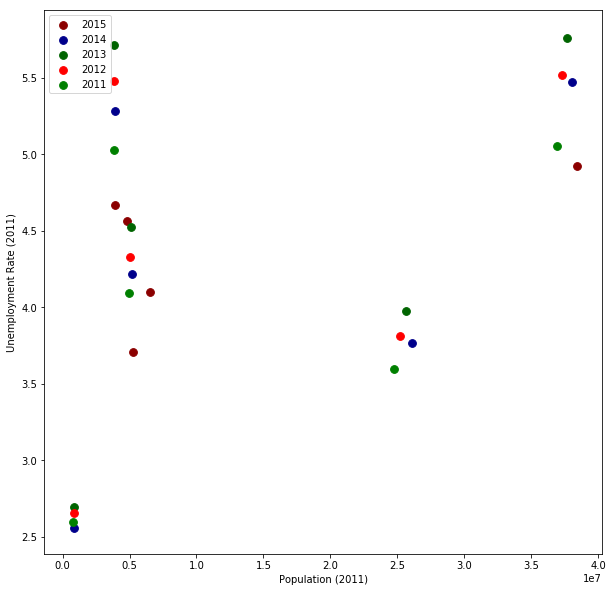

In [15]:
# # 5 states plot for Unemployment Rate v. Population

# Unempl5States = census_2011_2015.drop([0, 1, 2, 3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 38, 39, 40, 42, 44, 45, 46, 47, 48, 49, 50, 51])

# Unempl5States["Population (2015)"] = pd.to_numeric(Unempl5States["Population (2015)"])
# Unempl5States["Population (2014)"] = pd.to_numeric(Unempl5States["Population (2014)"])
# Unempl5States["Population (2013)"] = pd.to_numeric(Unempl5States["Population (2013)"])
# Unempl5States["Population (2012)"] = pd.to_numeric(Unempl5States["Population (2012)"])
# Unempl5States["Population (2011)"] = pd.to_numeric(Unempl5States["Population (2011)"])
# Unempl5States["Unemployment Rate (2015)"] = pd.to_numeric(Unempl5States["Unemployment Rate (2015)"])
# Unempl5States["Unemployment Rate (2014)"] = pd.to_numeric(Unempl5States["Unemployment Rate (2014)"])
# Unempl5States["Unemployment Rate (2013)"] = pd.to_numeric(Unempl5States["Unemployment Rate (2013)"])
# Unempl5States["Unemployment Rate (2012)"] = pd.to_numeric(Unempl5States["Unemployment Rate (2012)"])
# Unempl5States["Unemployment Rate (2011)"] = pd.to_numeric(Unempl5States["Unemployment Rate (2011)"])

# fig_size = plt.rcParams["figure.figsize"]
# fig_size[0] = 10
# fig_size[1] = 10
# plt.rcParams["figure.figsize"] = fig_size

# ex = Unempl5States.plot.scatter(x='Population (2015)', y='Unemployment Rate (2015)', label='2015', color = 'DarkRed', s=60)
# Unempl5States.plot.scatter(x='Population (2014)', y='Unemployment Rate (2014)', label='2014', color='DarkBlue', s=60, ax=ex)
# Unempl5States.plot.scatter(x='Population (2013)', y='Unemployment Rate (2013)', label='2013', color='DarkGreen', s=60, ax=ex)
# Unempl5States.plot.scatter(x='Population (2012)', y='Unemployment Rate (2012)', label='2012', color='Red', s=60, ax=ex)
# Unempl5States.plot.scatter(x='Population (2011)', y='Unemployment Rate (2011)', label='2011', color='Green', s=60, ax=ex)

In [18]:
# # ADDING IN STATE ABBREVS TO CHART - IN PROGRESS

# st2015=['','','','','CA','CO','','','','','','','','','','','','','','','','','','','','','','','','','','','','','','','','OR','','','','SD','','TX','','','','','','','','','','','','','','','','','','','','','','','','','','','','']

# for line in range(0,census_2011_2015_5States.shape[0]):
#     ex.text(census_2011_2015_5States['Population (2015)'][line]+1.1,census_2011_2015_5States['Unemployment Rate (2015)'][line], st2015[line], weight='bold')

In [20]:
# Adding in Year columns

# amended 2011 code above
census_pd11s = pd.DataFrame(census_data11)
census_pd11s = census_pd11s.rename(columns={"B01003_001E": "Population",
                                      "B01002_001E": "Median Age",
                                      "B19013_001E": "Household Income",
                                      "B23025_005E": "Unemployment Count",
                                      "B25058_001E": "Median Rent",
                                      "B25077_001E": "Median Home Value",
                                      "NAME": "Name", 
                                      "state": "State"})
census_pd11s["Unemployment Rate"] = 100 * \
    census_pd11s["Unemployment Count"].astype(
        int) / census_pd11s["Population"].astype(int)
census_pd11s = census_pd11s[["State", "Name", "Population", "Median Age", "Household Income", "Unemployment Rate", "Median Rent", "Median Home Value"]]
census_pd11s["Year"] = "2011"


# amended 2012 code above
census_pd12s = pd.DataFrame(census_data12)
census_pd12s = census_pd12s.rename(columns={"B01003_001E": "Population",
                                      "B01002_001E": "Median Age",
                                      "B19013_001E": "Household Income",
                                      "B23025_005E": "Unemployment Count",
                                      "B25058_001E": "Median Rent",
                                      "B25077_001E": "Median Home Value", 
                                      "NAME": "Name", 
                                      "state": "State"})
census_pd12s["Unemployment Rate"] = 100 * \
    census_pd12s["Unemployment Count"].astype(
        int) / census_pd12s["Population"].astype(int)
census_pd12s = census_pd12s[["Name", "State", "Population", "Median Age", "Household Income", "Unemployment Rate", "Median Rent", "Median Home Value"]]
census_pd12s["Year"] = "2012"


# amended 2013 code above
census_pd13s = pd.DataFrame(census_data13)
census_pd13s = census_pd13s.rename(columns={"B01003_001E": "Population",
                                      "B01002_001E": "Median Age",
                                      "B19013_001E": "Household Income",
                                      "B23025_005E": "Unemployment Count",
                                      "B25058_001E": "Median Rent",
                                      "B25077_001E": "Median Home Value", 
                                      "NAME": "Name", 
                                      "state": "State"})
census_pd13s["Unemployment Rate"] = 100 * \
    census_pd13s["Unemployment Count"].astype(
        int) / census_pd13s["Population"].astype(int)
census_pd13s = census_pd13s[["Name", "State", "Population", "Median Age", "Household Income", "Unemployment Rate", "Median Rent", "Median Home Value"]]
census_pd13s["Year"] = "2013"


# amended 2014 code above
census_pd14s = pd.DataFrame(census_data14)
census_pd14s = census_pd14s.rename(columns={"B01003_001E": "Population",
                                      "B01002_001E": "Median Age",
                                      "B19013_001E": "Household Income",
                                      "B23025_005E": "Unemployment Count",
                                      "B25058_001E": "Median Rent",
                                      "B25077_001E": "Median Home Value", 
                                      "NAME": "Name", 
                                      "state": "State"})
census_pd14s["Unemployment Rate"] = 100 * \
    census_pd14s["Unemployment Count"].astype(
        int) / census_pd14s["Population"].astype(int)
census_pd14s = census_pd14s[["Name", "State", "Population", "Median Age", "Household Income", "Unemployment Rate", "Median Rent", "Median Home Value"]]
census_pd14s["Year"] = "2014"


# amended 2015 code above
census_pd15s = pd.DataFrame(census_data15)
census_pd15s = census_pd15s.rename(columns={"B01003_001E": "Population",
                                      "B01002_001E": "Median Age",
                                      "B19013_001E": "Household Income",
                                      "B23025_005E": "Unemployment Count",
                                      "B25058_001E": "Median Rent",
                                      "B25077_001E": "Median Home Value", 
                                      "NAME": "Name", 
                                      "state": "State"})
census_pd15s["Unemployment Rate"] = 100 * \
    census_pd15s["Unemployment Count"].astype(
        int) / census_pd15s["Population"].astype(int)
census_pd15s = census_pd15s[["Name", "State", "Population", "Median Age", "Household Income", "Unemployment Rate", "Median Rent", "Median Home Value"]]
census_pd15s["Year"] = "2015"


#Append and drop for only 5 states

new = census_pd11s.append([census_pd12s,census_pd13s,census_pd14s,census_pd15s], ignore_index=True)
year5states = new.drop([0, 1, 2, 3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 38, 39, 40, 42, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 90, 91, 92, 94, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 142, 143, 144, 146, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 194, 195, 196, 198, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 246, 247, 248, 249, 251, 253, 254, 255, 256, 257, 258, 259])
year5states

,Household Income,Median Age,Median Home Value,Median Rent,Name,Population,State,Unemployment Rate,Year
4,61632,35.1,421600,1083,California,36969200,06,5.055211,2011
5,57685,35.9,236700,771,Colorado,4966061,08,4.093365,2011
37,49850,38.2,252600,716,Oregon,3801991,41,5.030943,2011
41,48010,37.1,127000,482,South Dakota,807697,46,2.594785,2011
43,50920,33.5,126400,651,Texas,24774187,48,3.594217,2011
56,61400,35.2,383900,1110,California,3.73251e+07,06,5.517589,2012
57,58244,36.1,236800,802,Colorado,5.04285e+06,08,4.331259,2012
89,50036,38.4,246100,729,Oregon,3.83663e+06,41,5.483435,2012
93,49091,37.1,129800,505,South Dakota,815871,46,2.658141,2012
95,51563,33.6,128000,666,Texas,2.52089e+07,48,3.809798,2012


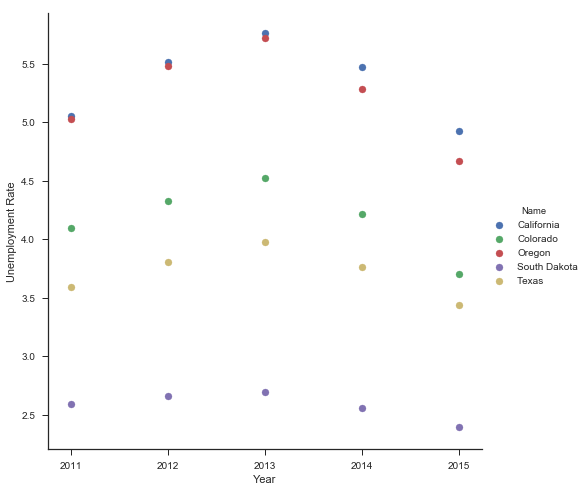

In [51]:
# Final Umemployment Rate v. year chart

sns.set(style='ticks')
fg = sns.FacetGrid(data=year5states, hue="Name", size=7)
fg.map(plt.scatter, "Year", 'Unemployment Rate').add_legend()
plt.savefig("UnemploymentByYear.png")

In [35]:
year5states["Population"] = pd.to_numeric(year5states["Population"])
year5states["Unemployment Rate"] = pd.to_numeric(year5states["Unemployment Rate"])
year5states["Household Income"] = pd.to_numeric(year5states["Household Income"])
year5states["Median Age"] = pd.to_numeric(year5states["Median Age"])
year5states["Median Home Value"] = pd.to_numeric(year5states["Median Home Value"])
year5states["Median Rent"] = pd.to_numeric(year5states["Median Rent"])


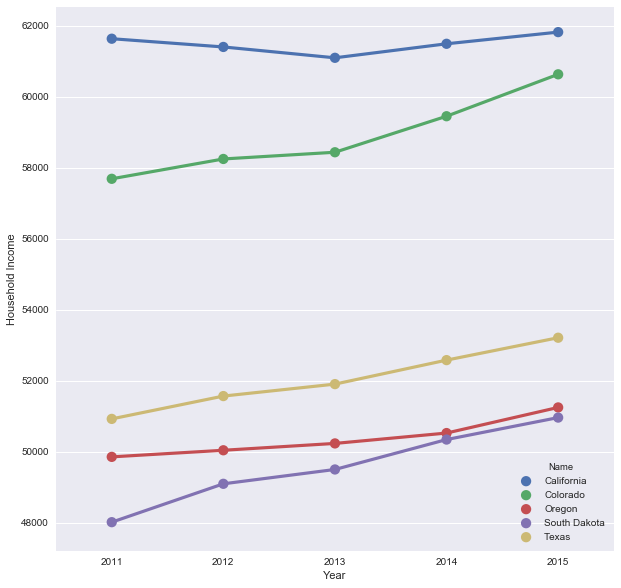

In [52]:
sns.set(style='darkgrid')
ax = sns.pointplot(x='Year', y='Household Income', hue='Name', data=year5states)
plt.savefig("IncomeByYear.png")

(45000, 64000)

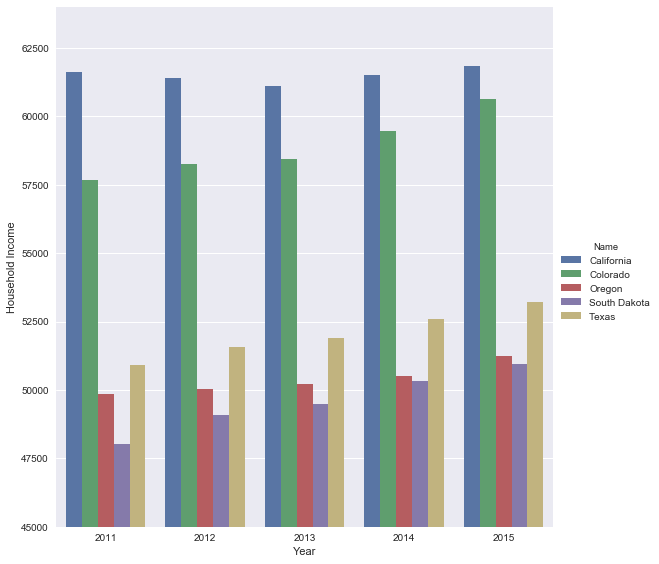

In [50]:
sns.factorplot(x='Year', y='Household Income', hue='Name', data=year5states, kind="bar", size=8)
plt.ylim(45000, 64000)